In [7]:
#WORK ON WAY TO REPRESENT HOW LONG THE PREP WAS "DOWN"
#prep took 130 seconds to "come back"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Load the .csv file
#csv_file = 'C:\\Users\\Ashle\\OneDrive\\Desktop\\Lab codes\\2025 data\\carbenoxolone data\\carbenoxolone.csv' #ashleigh's personal computer
csv_file = 'C:\\Users\\lab\\Documents\\src\\Ashleigh\\Data 2025\\carbenoxolone data\\carbenoxolone.csv' #lab computer

#Read CSV file
data = pd.read_csv(csv_file) #reads the file
#print(data)

#all scoring has been reviewed, graphs reflet true data


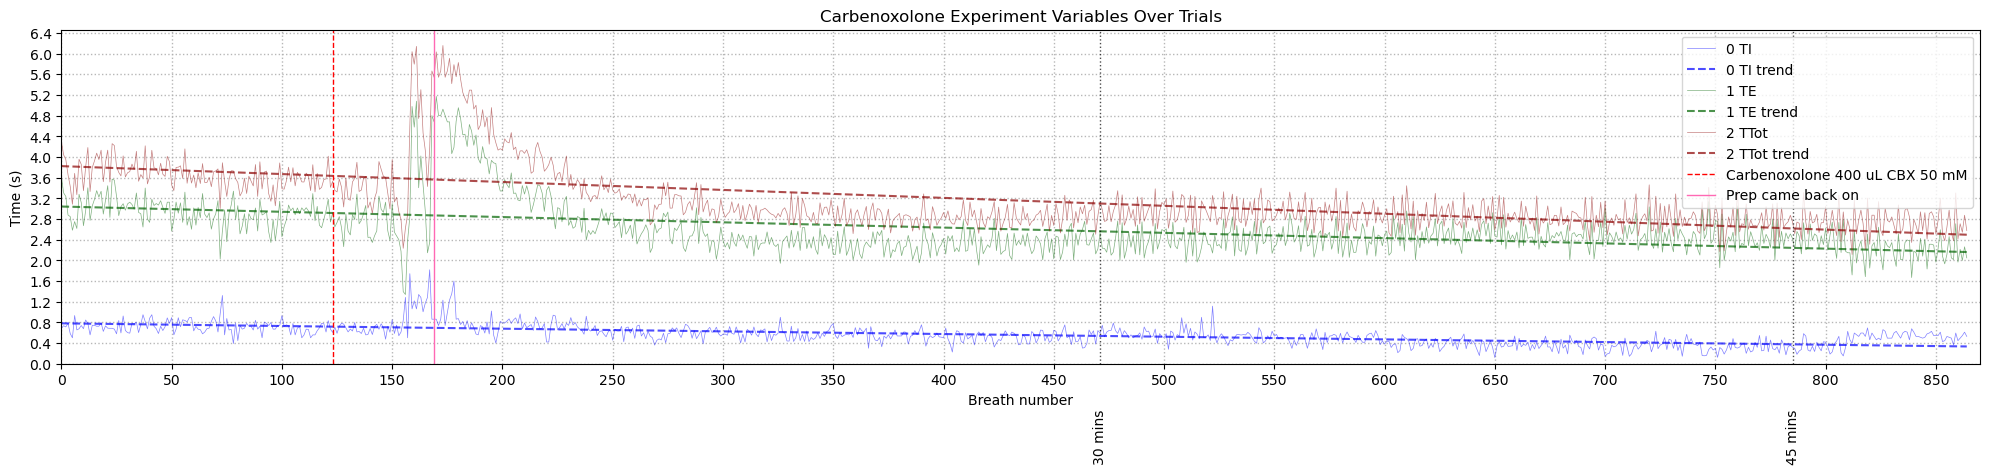

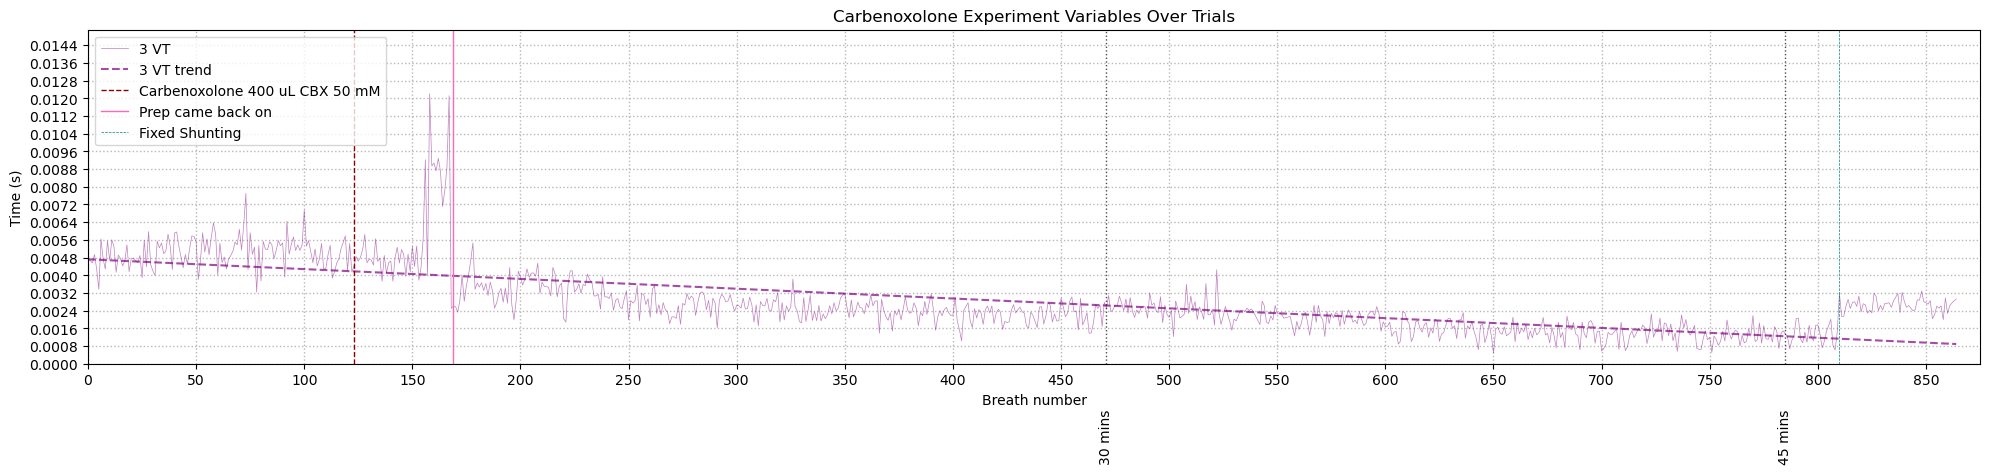

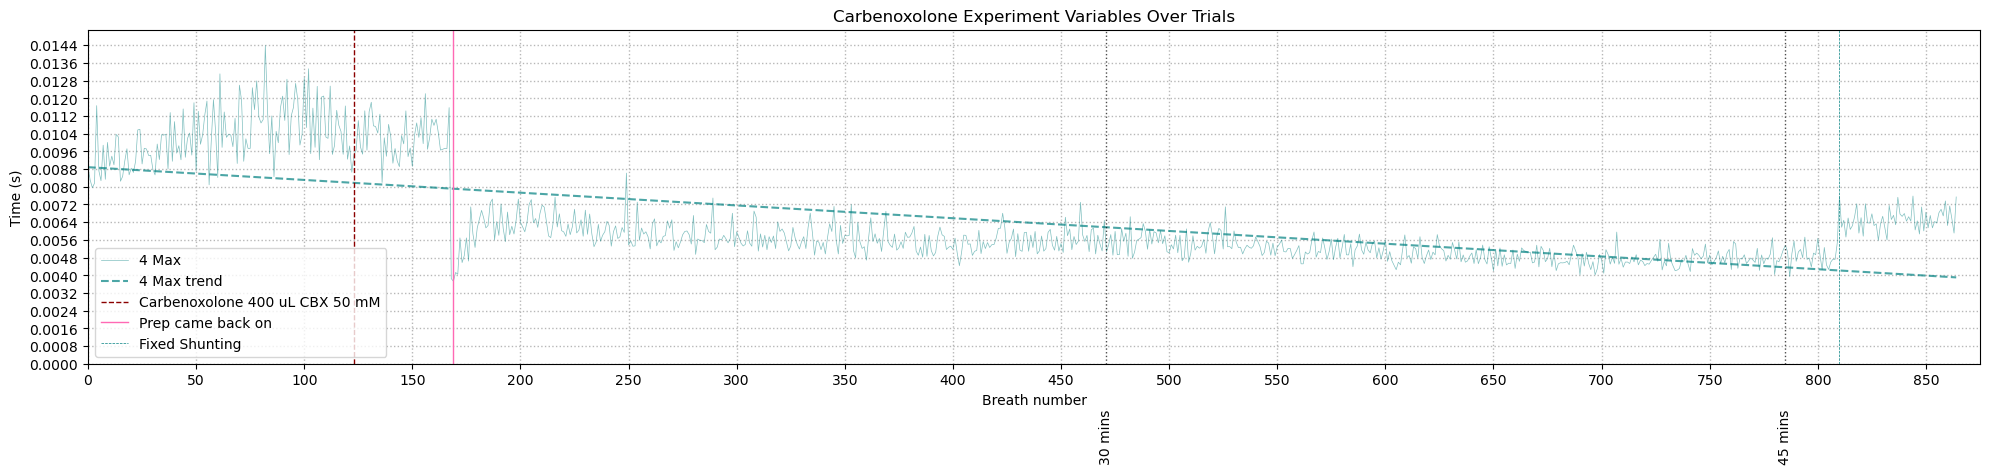

In [39]:
group1 = ['0 TI', '1 TE', '2 TTot']
group2 = ['3 VT', '4 Max']

colors_group1 = ['blue', 'darkgreen', 'darkred']      # for 0 TI, 1 TE, 2 TTot
colors_group2 = ['purple', 'teal']          # for 3 VT, 4 Max

event_times = [1800, 2700, 3600]  # event times in seconds
event_labels = ['30 mins', '45 mins', '60 mins']

data = data.copy()
time_shifted = []
last_time = 0
for i, t in enumerate(data['Time']):
    if i == 0:
        time_shifted.append(0)
        last_time = 0
    else:
        if t < data['Time'].iloc[i-1]:  # detect restart
            last_time += data['Time'].iloc[i-1]  # add last segment's end
        time_shifted.append(t + last_time - data['Time'].iloc[0])
data['Time_shifted'] = time_shifted

x = range(len(data)) # x-axis range

plt.figure(figsize=(20, 5)) #figure size
for var, color in zip(group1, colors_group1):
    plt.plot(x, data[var], label=var, linewidth=0.5, alpha=0.5, color=color)
    coeffs = np.polyfit(x, data[var], 1) #linear fit trend line
    trend = np.poly1d(coeffs)
    plt.plot(x, trend(x), linestyle='--', alpha=0.7, label=f'{var} trend', color=color) #plot linear fit

ax = plt.gca()
for t, label in zip(event_times, event_labels):
    if t <= max(data['Time_shifted']):  # only plot if within data
        idx = (np.abs(data['Time_shifted'] - t)).idxmin()
        plt.axvline(x=idx, color='black', linestyle=':', linewidth=1, alpha=0.7)
        plt.text(
            x=idx,
            y=-0.3,  # fixed position below x-axis in axis coordinates
            s=label,
            rotation=90,
            verticalalignment='bottom',
            horizontalalignment='center',
            fontsize=10,
            color='black',
            transform=ax.get_xaxis_transform()
        )

plt.grid(True, which='both', linestyle=':', linewidth=1, alpha=0.9)
plt.axvline(x=123, color='red', linestyle='--', linewidth=1, label='Carbenoxolone 400 uL CBX 50 mM')
plt.axvline(x=169, color='hotpink', linestyle='-', linewidth=1, label='Prep came back on')
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.yaxis.set_major_locator(plt.MaxNLocator(20))
plt.xlim([0,870])
plt.ylim(0, max(data[group1].max())*1.05)
plt.xlabel('Breath number')
plt.ylabel('Time (s)')  # all variables are in seconds
plt.title('Carbenoxolone Experiment Variables Over Trials')
plt.legend()
plt.tight_layout()
plt.show()

for var, color in zip(group2, colors_group2):
    plt.figure(figsize=(20, 5)) #figure size
    plt.plot(x, data[var], label=var, linewidth=0.5, alpha=0.5, color=color)
    coeffs = np.polyfit(x, data[var], 1) #linear fit trend line
    trend = np.poly1d(coeffs)
    plt.plot(x, trend(x), linestyle='--', alpha=0.7, label=f'{var} trend', color=color) #plot linear fit

    ax = plt.gca()
    for t, label in zip(event_times, event_labels):
        if t <= max(data['Time_shifted']):  # only plot if within data
            idx = (np.abs(data['Time_shifted'] - t)).idxmin()
            plt.axvline(x=idx, color='black', linestyle=':', linewidth=1, alpha=0.7)
            plt.text(
                x=idx,
                y=-0.3,  # fixed position below x-axis in axis coordinates
                s=label,
                rotation=90,
                verticalalignment='bottom',
                horizontalalignment='center',
                fontsize=10,
                color='black',
                transform=ax.get_xaxis_transform()
            )

    plt.grid(True, which='both', linestyle=':', linewidth=1, alpha=0.9)
    plt.axvline(x=123, color='darkred', linestyle='--', linewidth=1, label='Carbenoxolone 400 uL CBX 50 mM')
    plt.axvline(x=169, color='hotpink', linestyle='-', linewidth=1, label='Prep came back on')
    plt.axvline(x=810, color='teal', linestyle='--', linewidth=0.5, label='Fixed Shunting')
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    ax.yaxis.set_major_locator(plt.MaxNLocator(20))
    plt.ylim(0, max(data[group2].max())*1.05)
    plt.xlim([0,875])
    plt.xlabel('Breath number')
    plt.ylabel('Time (s)')  # all variables are in seconds
    plt.title('Carbenoxolone Experiment Variables Over Trials')
    plt.legend()
    plt.tight_layout()
    plt.show()


Normalized Mean % Change from Baseline:

0 TI: -26.63% change from baseline
1 TE: -13.31% change from baseline
2 TTot: -15.95% change from baseline
3 VT: -50.43% change from baseline
4 Max: -42.10% change from baseline


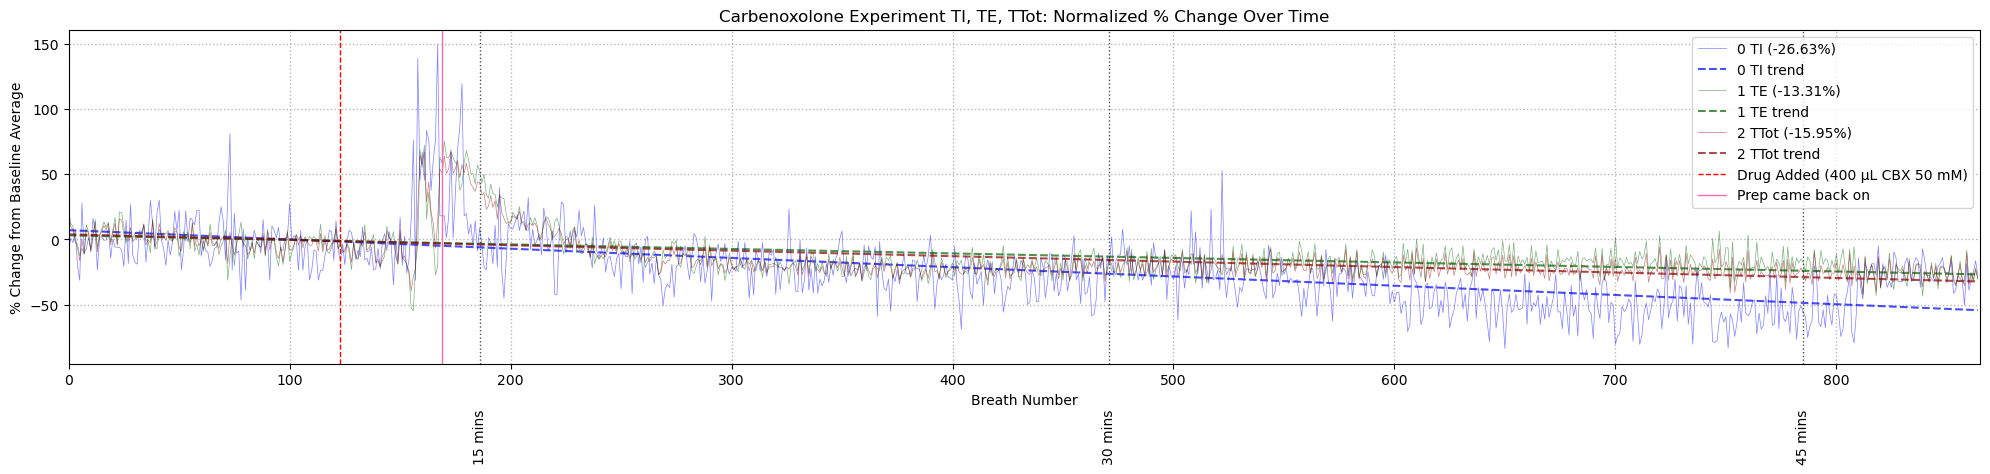

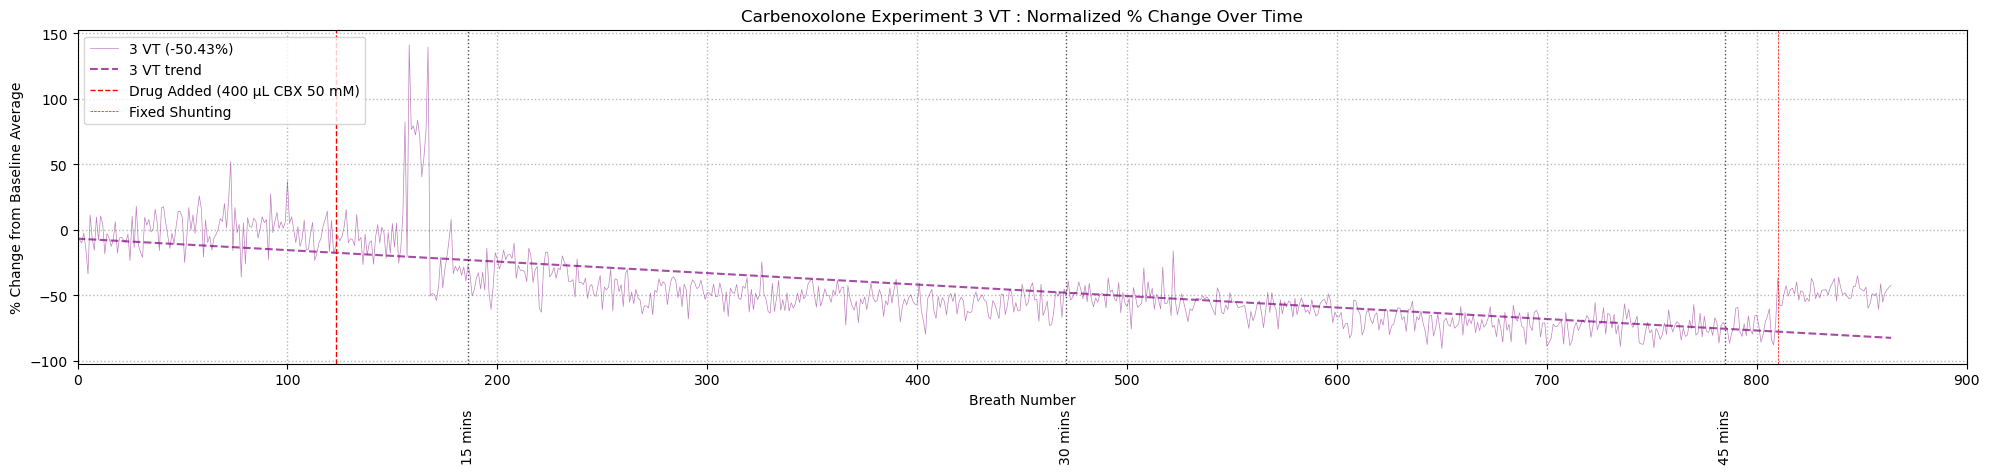

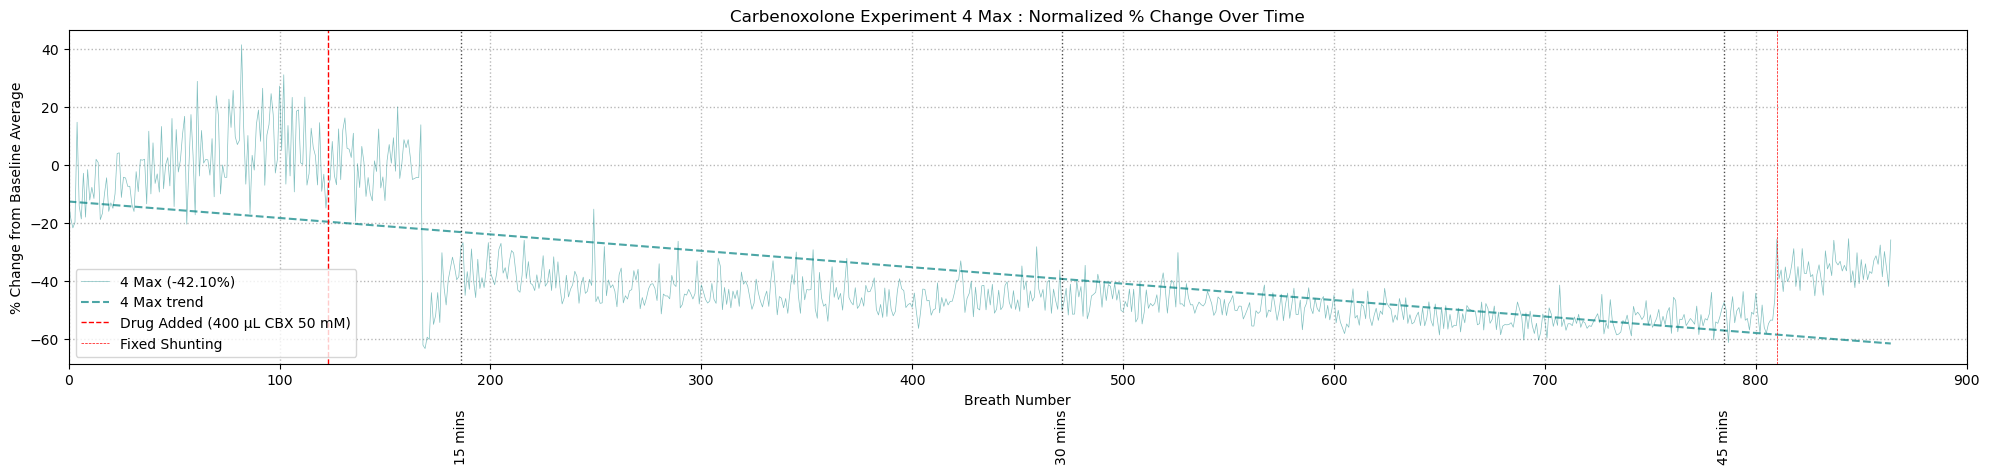

In [35]:
#Percent change from baseline (normalized) for all variables

colors_group1 = ['blue', 'darkgreen', 'darkred']      # for 0 TI, 1 TE, 2 TTot
colors_group2 = ['purple', 'teal']                   # for 3 VT, 4 Max
event_times = [900, 1800, 2700, 3600]                     # event times in seconds
event_labels = ['15 mins', '30 mins', '45 mins', '60 mins']

baseline_range = (0, 100) # breaths 0-100 is baseline, didn't include breaths close to drug administration
postdrug_range = (101, 866) # breaths 124-866 is post-drug

data = data.copy()
time_shifted = []
last_time = 0
for i, t in enumerate(data['Time']):
    if i == 0:
        time_shifted.append(0)
        last_time = 0
    else:
        if t < data['Time'].iloc[i-1]:  # detect restart
            last_time += data['Time'].iloc[i-1]  # add last segment's end
        time_shifted.append(t + last_time - data['Time'].iloc[0])
data['Time_shifted'] = time_shifted

normalized_data = data.copy()
for var in group1 + group2:
    baseline_mean = data[var].iloc[baseline_range[0]:baseline_range[1]].mean()
    normalized_data[var] = ((data[var] - baseline_mean) / baseline_mean) * 100

percent_changes = {}
for var in group1 + group2:
    postdrug_mean = normalized_data[var].iloc[postdrug_range[0]:postdrug_range[1]].mean()
    percent_changes[var] = postdrug_mean

#print out the percent changes
print("Normalized Mean % Change from Baseline:\n")
for var, change in percent_changes.items():
    print(f"{var}: {change:.2f}% change from baseline")

#plot ti, te, ttot together
xlim = len(data)  # set x-axis limit variable
x = range(xlim) #x axis range


plt.figure(figsize=(20, 5))
for var, color in zip(group1, colors_group1):
    plt.plot(x, normalized_data[var], label=f"{var} ({percent_changes[var]:.2f}%)", color=color, linewidth=0.5, alpha=0.5)
    coeffs = np.polyfit(x, normalized_data[var], 1) #linear fit trend line
    trend = np.poly1d(coeffs)
    plt.plot(x, trend(x), linestyle='--', alpha=0.7, label=f'{var} trend', color=color)

for t, label in zip(event_times, event_labels):
    if t <= max(data['Time_shifted']):
        idx = (np.abs(data['Time_shifted'] - t)).idxmin()
        plt.axvline(x=idx, color='black', linestyle=':', linewidth=1, alpha=0.7)
        ax = plt.gca()
        plt.text(
            x=idx,
            y=-0.3,  # shifted below the graph
            s=label,
            rotation=90,
            verticalalignment='bottom',
            horizontalalignment='center',
            fontsize=10,
            color='black',
            transform=ax.get_xaxis_transform()
        )

plt.axvline(x=123, color='red', linestyle='--', linewidth=1, label='Drug Added (400 µL CBX 50 mM)')
plt.axvline(x=169, color='hotpink', linestyle='-', linewidth=1, label='Prep came back on')
plt.grid(True, which='both', linestyle=':', linewidth=1, alpha=0.9)
plt.xlim([0,xlim])
plt.xlabel('Breath Number')
plt.ylabel('% Change from Baseline Average')
plt.title('Carbenoxolone Experiment TI, TE, TTot: Normalized % Change Over Time')
plt.legend()
plt.tight_layout()
plt.show()

#plot vt and max separately
for var, color in zip(group2, colors_group2):
    plt.figure(figsize=(20, 5))
    plt.plot(x, normalized_data[var], label=f"{var} ({percent_changes[var]:.2f}%)", color=color, linewidth=0.5, alpha=0.5)
    coeffs = np.polyfit(x, normalized_data[var], 1) #linear fit trend line
    trend = np.poly1d(coeffs)
    plt.plot(x, trend(x), linestyle='--', alpha=0.7, label=f'{var} trend', color=color)

    for t, label in zip(event_times, event_labels):
        if t <= max(data['Time_shifted']):
            idx = (np.abs(data['Time_shifted'] - t)).idxmin()
            plt.axvline(x=idx, color='black', linestyle=':', linewidth=1, alpha=0.7)
            ax = plt.gca()
            plt.text(
                x=idx,
                y=-0.3,  # shifted below the graph
                s=label,
                rotation=90,
                verticalalignment='bottom',
                horizontalalignment='center',
                fontsize=10,
                color='black',
                transform=ax.get_xaxis_transform()
            )

    plt.axvline(x=123, color='red', linestyle='--', linewidth=1, label='Drug Added (400 µL CBX 50 mM)')
    plt.axvline(x=810, color='red', linestyle='--', linewidth=0.5, label='Fixed Shunting')
    plt.grid(True, which='both', linestyle=':', linewidth=1, alpha=0.9)
    plt.xlim([0,900])
    plt.xlabel('Breath Number')
    plt.ylabel('% Change from Baseline Average')
    plt.title(f'Carbenoxolone Experiment {var} : Normalized % Change Over Time')
    plt.legend()
    plt.tight_layout()
    plt.show()
